In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from matplotlib import cm, colors
from matplotlib.colors import ListedColormap
import seaborn as sns

from pylab import rc
rc('text',usetex=True)

# %matplotlib inline
# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('png')

#matplotlib.rcParams['font.serif'] = ['Computer Modern']
#matplotlib.rcParams['font.family'] = 'serif'


sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")

sns.set_style('ticks')


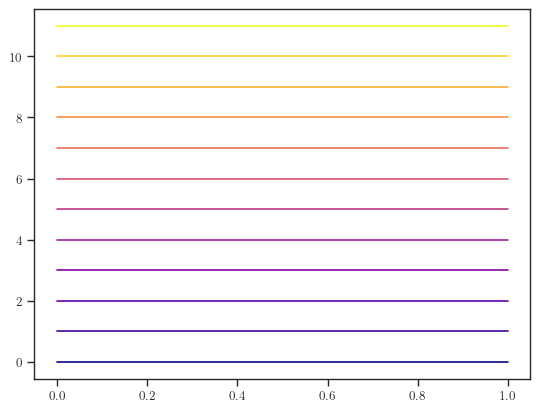

In [2]:
colors = cm.plasma(np.linspace(0, 1, 12))

for i, color in enumerate(colors):
    plt.plot([0, 1], [i, i], color=color)

plt.show()

In [3]:
plot_data_files = [
    "DOS0N100mu15W1.dat",
    "DOS0N1000mu15W1.dat",
    "DOS0N7000mu15W1.dat",
]

def read_data(file):
    with open(file, "r") as f:
        plot_data = f.read()
        plot_data = np.array(list(map(lambda x: x.split('\t'), plot_data.split('\n')))).astype(float)
        
    return plot_data

plot_data = [read_data(f) for f in plot_data_files]

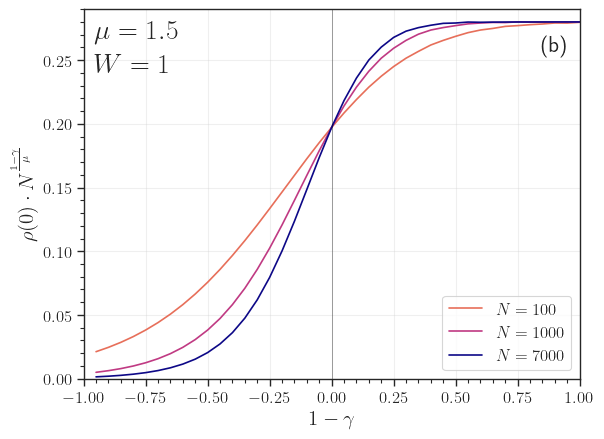

In [4]:
fig, ax = plt.subplots()

limits = [-1, 1]
ax.set_xlim(limits[0], limits[1])

labels = [
    r"$N=100$",
    r"$N=1000$",
    r"$N=7000$",
]

colorsgr = [
    colors[7],
    colors[5],
    colors[0],
]

for i in range(len(plot_data)):
    ax.plot(
        plot_data[i][:, 0], 
        plot_data[i][:, 1],
        color = colorsgr[i],
        label = labels[i])
    
ax.grid(False)
ax.set_xlabel(r'$1-\gamma$', fontsize=15)
ax.set_ylabel(r"$\rho(0) \cdot N^{\frac{1-\gamma}{\mu}}$", fontsize=15)
ax.legend(fontsize=12, loc="lower right")
ax.set_ylim(0,0.29)


ax.text(
    0.95, 
    0.9, 
    r"(b)", 
    transform=ax.transAxes,
    fontsize=16,
    horizontalalignment="center",
    verticalalignment="center",
)

ax.text(
    0.02, 
    0.92, 
    r"$\mu=1.5$", 
    transform=ax.transAxes,
    fontsize=20,
)

ax.text(
    0.02, 
    0.83, 
    r"$W=1$", 
    transform=ax.transAxes,
    fontsize=20,
)


ax.grid(True, which="major", alpha=0.3)
ax.plot([0.0, 0.0], [0.0, 1], color="black",alpha = 0.5, linewidth=0.5)


ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=12)


plt.savefig("order_param.pdf",bbox_inches='tight',pad_inches=0.1)
plt.show()    

